In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from pandas import ExcelWriter
from sklearn.metrics import plot_confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
trainingData = pd.read_csv(r'E:\University College Dublin\Business Analytics\Data Management and Mining\MIS41270-Data Management and Mining-202021 Spring - 3152021 - 1150 PM/QUB_Insurance_Data_Assignment_Training.csv')
ScoringData = pd.read_csv(r'E:\University College Dublin\Business Analytics\Data Management and Mining\MIS41270-Data Management and Mining-202021 Spring - 3152021 - 1150 PM/QUB_Insurance_Data_Assignment_Scoring.csv')

In [3]:
trainingData.head()

,CustomerID,Title,GivenName,MiddleInitial,Surname,CreditCardType,Occupation,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel
0,1,Mrs.,Macy,A,Boyle,AMEX,Clinical laboratory technologist,female,23,Urban,No,NaN,NaN,No,NaN,NaN,NaN,Yes,Premium,SMS
1,2,Ms.,Thea,L,McIntosh,AMEX,NaN,female,44,Urban,No,NaN,NaN,Yes,Level1,2.0,3.0,No,NaN,Phone
2,4,Ms.,Murron,P,Miller,AMEX,Sheriff,female,19,Urban,Yes,4920.0,Bundle,No,NaN,NaN,NaN,No,NaN,SMS
3,5,Mr.,Kai,A,Henderson,Visa,Automotive painter,male,47,Rural,Yes,14994.0,Single,Yes,Level1,1.0,2.0,Yes,Business,Phone
4,11,Mrs.,Kayla,A,Brown,Visa,Risk manager,female,54,Rural,Yes,14605.0,Single,Yes,Level2,2.0,3.0,No,NaN,Email


In [4]:
trainingData.isna().sum()

CustomerID                   0
Title                        0
GivenName                    0
MiddleInitial                0
Surname                      0
CreditCardType             722
Occupation                1556
Gender                       0
Age                          0
Location                     0
MotorInsurance               0
MotorValue                 729
MotorType                  729
HealthInsurance              0
HealthType                1547
HealthDependentsAdults    1547
HealthDependentsKids      1547
TravelInsurance              0
TravelType                1982
PrefChannel                  0
dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

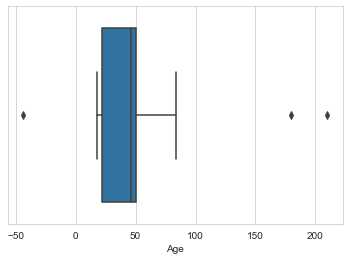

In [5]:
sns.boxplot(trainingData['Age'])

<AxesSubplot:>

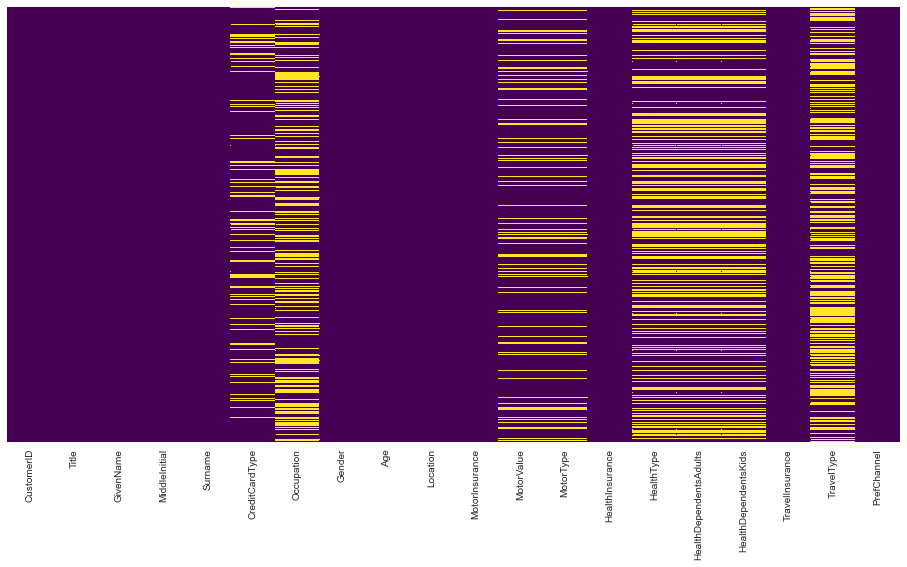

In [6]:
plt.figure(figsize = (16,8) )
sns.heatmap(trainingData.isnull(), yticklabels=False, cbar= False, cmap='viridis')

<AxesSubplot:xlabel='PrefChannel', ylabel='count'>

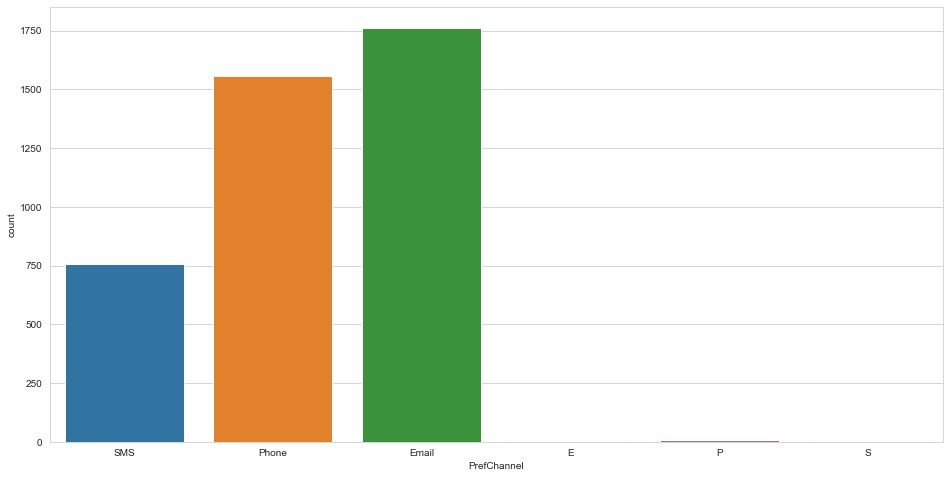

In [7]:
plt.figure(figsize = (16,8) )
sns.countplot(x='PrefChannel', data = trainingData)

<AxesSubplot:xlabel='PrefChannel', ylabel='count'>

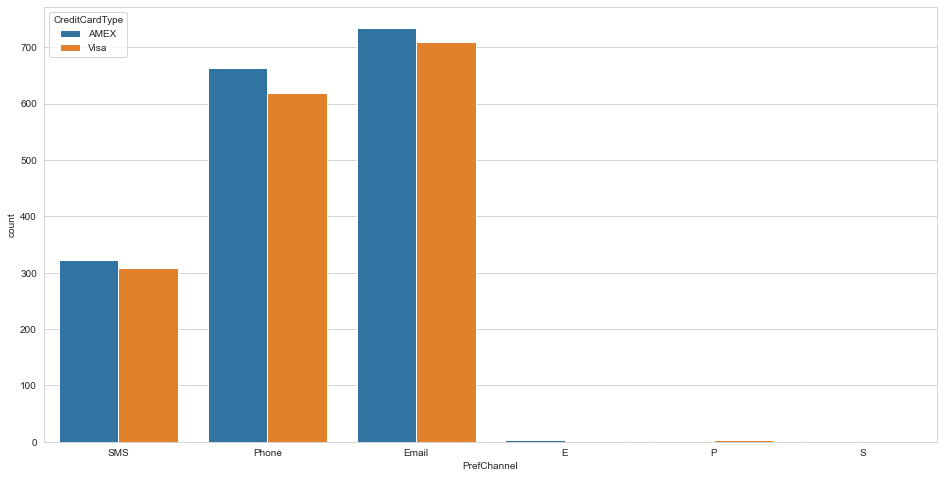

In [8]:
plt.figure(figsize = (16,8) )
sns.countplot(x='PrefChannel', hue ='CreditCardType' ,data = trainingData)

<AxesSubplot:xlabel='PrefChannel', ylabel='count'>

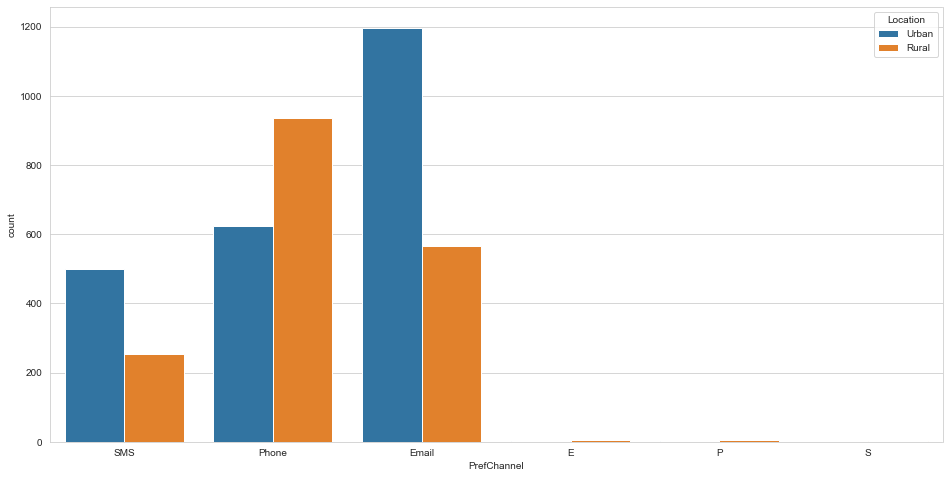

In [9]:
plt.figure(figsize = (16,8) )
sns.countplot(x='PrefChannel', hue ='Location' ,data = trainingData)

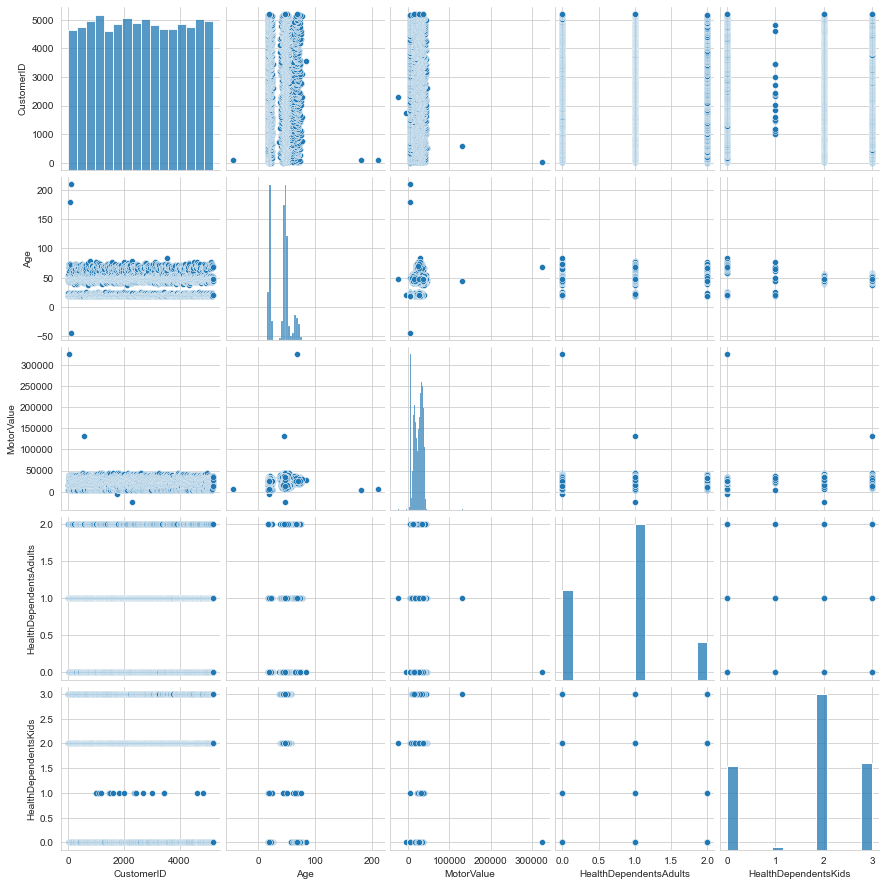

In [10]:
sns.pairplot(trainingData)

In [11]:
#rename
def perfChannel(x):
    if x == 'E' or x == 'Email':
        return 'Email'
    elif x == 'P' or x == 'Phone' :
        return 'Phone'
    elif x == 'S' or x == 'SMS':
        return 'SMS'
    else:
        pass

In [12]:
trainingData['PrefChannel'].unique()

array(['SMS', 'Phone', 'Email', 'E', 'P', 'S'], dtype=object)

In [13]:
trainingData["PrefChannel"] = trainingData["PrefChannel"].apply(perfChannel)

In [14]:
trainingData['PrefChannel'].unique()

array(['SMS', 'Phone', 'Email'], dtype=object)

In [15]:
dummy_creditCard = pd.get_dummies(trainingData['CreditCardType'])
dummy_creditCard.columns = ['AMEX','Visa']
dummy_creditCard

,AMEX,Visa
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
4085,0,1
4086,0,1
4087,0,1
4088,0,1


In [16]:
trainingData.drop(['CreditCardType'],axis = 1, inplace = True)

In [17]:
trainingData =pd.concat([trainingData,dummy_creditCard],axis = 1)

In [18]:
trainingData.head()

,CustomerID,Title,GivenName,MiddleInitial,Surname,Occupation,Gender,Age,Location,MotorInsurance,...,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel,AMEX,Visa
0,1,Mrs.,Macy,A,Boyle,Clinical laboratory technologist,female,23,Urban,No,...,NaN,No,NaN,NaN,NaN,Yes,Premium,SMS,1,0
1,2,Ms.,Thea,L,McIntosh,NaN,female,44,Urban,No,...,NaN,Yes,Level1,2.0,3.0,No,NaN,Phone,1,0
2,4,Ms.,Murron,P,Miller,Sheriff,female,19,Urban,Yes,...,Bundle,No,NaN,NaN,NaN,No,NaN,SMS,1,0
3,5,Mr.,Kai,A,Henderson,Automotive painter,male,47,Rural,Yes,...,Single,Yes,Level1,1.0,2.0,Yes,Business,Phone,0,1
4,11,Mrs.,Kayla,A,Brown,Risk manager,female,54,Rural,Yes,...,Single,Yes,Level2,2.0,3.0,No,NaN,Email,0,1


In [19]:
trainingData.Gender.unique()

array(['female', 'male', 'f', 'm'], dtype=object)

In [20]:
#rename
def gender(x):
    if x == 'm' or x == 'male':
        return 'Male'
    elif x == 'f' or x == 'female' :
        return 'female'
    else:
        pass

In [21]:
trainingData["Gender"] =trainingData["Gender"].apply(gender)

In [22]:
trainingData['Gender'] = trainingData['Gender'].replace(['Male'],1)
trainingData['Gender'] = trainingData['Gender'].replace(['female'],0)

In [23]:
trainingData.head()

,CustomerID,Title,GivenName,MiddleInitial,Surname,Occupation,Gender,Age,Location,MotorInsurance,...,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel,AMEX,Visa
0,1,Mrs.,Macy,A,Boyle,Clinical laboratory technologist,0,23,Urban,No,...,NaN,No,NaN,NaN,NaN,Yes,Premium,SMS,1,0
1,2,Ms.,Thea,L,McIntosh,NaN,0,44,Urban,No,...,NaN,Yes,Level1,2.0,3.0,No,NaN,Phone,1,0
2,4,Ms.,Murron,P,Miller,Sheriff,0,19,Urban,Yes,...,Bundle,No,NaN,NaN,NaN,No,NaN,SMS,1,0
3,5,Mr.,Kai,A,Henderson,Automotive painter,1,47,Rural,Yes,...,Single,Yes,Level1,1.0,2.0,Yes,Business,Phone,0,1
4,11,Mrs.,Kayla,A,Brown,Risk manager,0,54,Rural,Yes,...,Single,Yes,Level2,2.0,3.0,No,NaN,Email,0,1


In [24]:
del(trainingData['Occupation'])

In [25]:
# trainingData.Location.unique()
trainingData['Location'] = trainingData['Location'].replace(['Urban'],0)
trainingData['Location'] = trainingData['Location'].replace(['Rural'],1)

In [26]:
trainingData.head()

,CustomerID,Title,GivenName,MiddleInitial,Surname,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel,AMEX,Visa
0,1,Mrs.,Macy,A,Boyle,0,23,0,No,NaN,NaN,No,NaN,NaN,NaN,Yes,Premium,SMS,1,0
1,2,Ms.,Thea,L,McIntosh,0,44,0,No,NaN,NaN,Yes,Level1,2.0,3.0,No,NaN,Phone,1,0
2,4,Ms.,Murron,P,Miller,0,19,0,Yes,4920.0,Bundle,No,NaN,NaN,NaN,No,NaN,SMS,1,0
3,5,Mr.,Kai,A,Henderson,1,47,1,Yes,14994.0,Single,Yes,Level1,1.0,2.0,Yes,Business,Phone,0,1
4,11,Mrs.,Kayla,A,Brown,0,54,1,Yes,14605.0,Single,Yes,Level2,2.0,3.0,No,NaN,Email,0,1


In [27]:
def yesNo(x):
    if x == 'No':
        return 0
    else:
        return 1

In [28]:
trainingData['MotorInsurance'] = trainingData['MotorInsurance'].apply(yesNo)

In [29]:
trainingData.head()

,CustomerID,Title,GivenName,MiddleInitial,Surname,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel,AMEX,Visa
0,1,Mrs.,Macy,A,Boyle,0,23,0,0,NaN,NaN,No,NaN,NaN,NaN,Yes,Premium,SMS,1,0
1,2,Ms.,Thea,L,McIntosh,0,44,0,0,NaN,NaN,Yes,Level1,2.0,3.0,No,NaN,Phone,1,0
2,4,Ms.,Murron,P,Miller,0,19,0,1,4920.0,Bundle,No,NaN,NaN,NaN,No,NaN,SMS,1,0
3,5,Mr.,Kai,A,Henderson,1,47,1,1,14994.0,Single,Yes,Level1,1.0,2.0,Yes,Business,Phone,0,1
4,11,Mrs.,Kayla,A,Brown,0,54,1,1,14605.0,Single,Yes,Level2,2.0,3.0,No,NaN,Email,0,1


In [30]:
trainingData['MotorValue'] = trainingData['MotorValue'].fillna(0)
trainingData['MotorValue'] = trainingData['MotorValue'].astype(int)

In [31]:
trainingData.head()

,CustomerID,Title,GivenName,MiddleInitial,Surname,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel,AMEX,Visa
0,1,Mrs.,Macy,A,Boyle,0,23,0,0,0,NaN,No,NaN,NaN,NaN,Yes,Premium,SMS,1,0
1,2,Ms.,Thea,L,McIntosh,0,44,0,0,0,NaN,Yes,Level1,2.0,3.0,No,NaN,Phone,1,0
2,4,Ms.,Murron,P,Miller,0,19,0,1,4920,Bundle,No,NaN,NaN,NaN,No,NaN,SMS,1,0
3,5,Mr.,Kai,A,Henderson,1,47,1,1,14994,Single,Yes,Level1,1.0,2.0,Yes,Business,Phone,0,1
4,11,Mrs.,Kayla,A,Brown,0,54,1,1,14605,Single,Yes,Level2,2.0,3.0,No,NaN,Email,0,1


In [32]:
dummy_motorType = pd.get_dummies(trainingData['MotorType'])
dummy_motorType.columns = ['Bundle_Motor_Type','Single_Motor_Type']
dummy_motorType

,Bundle_Motor_Type,Single_Motor_Type
0,0,0
1,0,0
2,1,0
3,0,1
4,0,1
...,...,...
4085,0,0
4086,0,1
4087,0,1
4088,0,1


In [33]:
trainingData.drop(['MotorType'],axis = 1, inplace = True)

In [34]:
trainingData =pd.concat([trainingData,dummy_motorType],axis = 1)

In [35]:
trainingData.head()

,CustomerID,Title,GivenName,MiddleInitial,Surname,Gender,Age,Location,MotorInsurance,MotorValue,...,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel,AMEX,Visa,Bundle_Motor_Type,Single_Motor_Type
0,1,Mrs.,Macy,A,Boyle,0,23,0,0,0,...,NaN,NaN,NaN,Yes,Premium,SMS,1,0,0,0
1,2,Ms.,Thea,L,McIntosh,0,44,0,0,0,...,Level1,2.0,3.0,No,NaN,Phone,1,0,0,0
2,4,Ms.,Murron,P,Miller,0,19,0,1,4920,...,NaN,NaN,NaN,No,NaN,SMS,1,0,1,0
3,5,Mr.,Kai,A,Henderson,1,47,1,1,14994,...,Level1,1.0,2.0,Yes,Business,Phone,0,1,0,1
4,11,Mrs.,Kayla,A,Brown,0,54,1,1,14605,...,Level2,2.0,3.0,No,NaN,Email,0,1,0,1


In [36]:
trainingData['HealthInsurance'] = trainingData['HealthInsurance'].apply(yesNo)

In [37]:
trainingData.head()

,CustomerID,Title,GivenName,MiddleInitial,Surname,Gender,Age,Location,MotorInsurance,MotorValue,...,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel,AMEX,Visa,Bundle_Motor_Type,Single_Motor_Type
0,1,Mrs.,Macy,A,Boyle,0,23,0,0,0,...,NaN,NaN,NaN,Yes,Premium,SMS,1,0,0,0
1,2,Ms.,Thea,L,McIntosh,0,44,0,0,0,...,Level1,2.0,3.0,No,NaN,Phone,1,0,0,0
2,4,Ms.,Murron,P,Miller,0,19,0,1,4920,...,NaN,NaN,NaN,No,NaN,SMS,1,0,1,0
3,5,Mr.,Kai,A,Henderson,1,47,1,1,14994,...,Level1,1.0,2.0,Yes,Business,Phone,0,1,0,1
4,11,Mrs.,Kayla,A,Brown,0,54,1,1,14605,...,Level2,2.0,3.0,No,NaN,Email,0,1,0,1


In [38]:
trainingData['TravelInsurance'] = trainingData['TravelInsurance'].apply(yesNo)

In [39]:
dummy_healthType = pd.get_dummies(trainingData['HealthType'])
dummy_healthType.columns = ['Health_Type_Level1','Health_Type_Level2','Health_Type_Level3']
dummy_healthType

,Health_Type_Level1,Health_Type_Level2,Health_Type_Level3
0,0,0,0
1,1,0,0
2,0,0,0
3,1,0,0
4,0,1,0
...,...,...,...
4085,0,0,1
4086,0,0,0
4087,0,1,0
4088,0,1,0


In [40]:
trainingData.drop(['HealthType'],axis = 1, inplace = True)

In [41]:
trainingData =pd.concat([trainingData,dummy_healthType],axis = 1)

In [42]:
trainingData['HealthDependentsKids'] = trainingData['HealthDependentsKids'].fillna(0)

In [43]:
trainingData['HealthDependentsAdults'] = trainingData['HealthDependentsAdults'].fillna(0)

In [44]:
dummy_travelType = pd.get_dummies(trainingData['TravelType'])
dummy_travelType.columns = ['Travel_Type_Backpacker','Travel_Type_Business','Travel_Type_Premium','Travel_Type_Senior','Travel_Type_Standard']
dummy_travelType

,Travel_Type_Backpacker,Travel_Type_Business,Travel_Type_Premium,Travel_Type_Senior,Travel_Type_Standard
0,0,0,1,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,1,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
4085,0,0,0,0,0
4086,0,0,0,0,0
4087,0,0,0,0,0
4088,0,0,0,0,0


In [45]:
trainingData.drop(['TravelType'],axis = 1, inplace = True)

In [46]:
trainingData =pd.concat([trainingData,dummy_travelType],axis = 1)

In [47]:
trainingData['PrefChannel'] = trainingData['PrefChannel'].replace(['Email'],1)
trainingData['PrefChannel'] = trainingData['PrefChannel'].replace(['Phone'],2)
trainingData['PrefChannel'] = trainingData['PrefChannel'].replace(['SMS'],3)

In [48]:
trainingData['PrefChannel'].head()

0    3
1    2
2    3
3    2
4    1
Name: PrefChannel, dtype: int64

# VALIDATION

In [49]:
data = trainingData

In [50]:
data.head()

,CustomerID,Title,GivenName,MiddleInitial,Surname,Gender,Age,Location,MotorInsurance,MotorValue,...,Bundle_Motor_Type,Single_Motor_Type,Health_Type_Level1,Health_Type_Level2,Health_Type_Level3,Travel_Type_Backpacker,Travel_Type_Business,Travel_Type_Premium,Travel_Type_Senior,Travel_Type_Standard
0,1,Mrs.,Macy,A,Boyle,0,23,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,Ms.,Thea,L,McIntosh,0,44,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,4,Ms.,Murron,P,Miller,0,19,0,1,4920,...,1,0,0,0,0,0,0,0,0,0
3,5,Mr.,Kai,A,Henderson,1,47,1,1,14994,...,0,1,1,0,0,0,1,0,0,0
4,11,Mrs.,Kayla,A,Brown,0,54,1,1,14605,...,0,1,0,1,0,0,0,0,0,0


In [51]:
X = trainingData.drop(['CustomerID','Title','GivenName','MiddleInitial','Surname','PrefChannel'],axis = 1) 
Y = trainingData['PrefChannel']

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

In [53]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((2863, 21), (1227, 21), (2863,), (1227,))

LOGISTIC REGRESSION

In [54]:
LogM = LogisticRegression()

In [55]:
LogM.fit(X_train,Y_train)

LogisticRegression()

In [56]:
y_pred = LogM.predict(X_test)

In [57]:
accuracy_score(y_pred,Y_test)

0.5835370823145885

In [58]:
# #SVM
# from sklearn.svm import SVC

# model_ = SVC(kernel = 'linear')

# model_.fit(X_train,Y_train)

# predicted = model_.predict(X_test)

# accuracy_score(Y_test,predicted)

In [59]:

clf = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth=3,min_samples_leaf=5)
clf.fit(X_train,Y_train)
predict_df = clf.predict(X_test)
accuracy_score(Y_test, predict_df)

0.6634066829665851

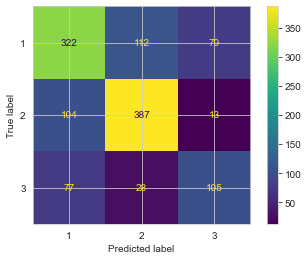

In [60]:

plot_confusion_matrix(clf, X_test, Y_test)

In [61]:
clf1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth=3,min_samples_leaf=5)
clf1.fit(X_train,Y_train)
predict_df = clf1.predict(X_test)
accuracy_score(Y_test, predict_df)


0.6634066829665851

In [62]:
#RANDOM FOREST
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X,Y,test_size = 0.3)


classifierRf= RandomForestClassifier(n_estimators= 10, criterion="entropy") 

classifierRf.fit(X_train4, Y_train4)

#Predicting the test set result
y_predRF= classifierRf.predict(X_test4) 

y_predRF


array([1, 2, 2, ..., 3, 2, 2], dtype=int64)

In [63]:
#Creating the Confusion matrix

cm= confusion_matrix(Y_test4, y_predRF)
cm

array([[350, 115,  66],
       [140, 291,  17],
       [134,  44,  70]], dtype=int64)

0.5794621026894865

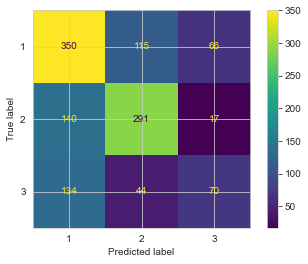

In [64]:

plot_confusion_matrix(classifierRf, X_test4, Y_test4)

accuracy_score(Y_test4, y_predRF)

0.5571847507331378

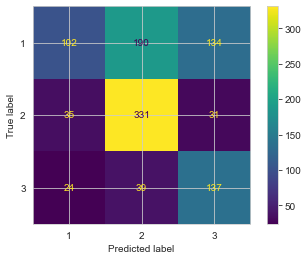

In [65]:
#NAIVE BAYES

modelNB = GaussianNB()

X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X,Y,test_size = 0.25)

modelNB.fit(X_train5,Y_train5)

pred_NB = modelNB.predict(X_test5)

pred_NB

#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test5, pred_NB)
cm

from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(modelNB, X_test5, Y_test5)

accuracy_score(Y_test5, pred_NB)

# Feature Scaling

In [66]:
scaler = StandardScaler()

X_trainFS, X_testFS, Y_trainFS, Y_testFS = train_test_split(X,Y,test_size = 0.3)

scaler.fit(X_trainFS)

StandardScaler()

In [67]:
X_trainFS = scaler.transform(X_trainFS) 
X_testFS = scaler.transform(X_testFS) 
X_trainFS

array([[ 1.01230059,  0.48527638, -0.86417407, ..., -0.35473318,
        -0.21455956, -0.35846649],
       [-0.98784888,  0.29896201, -0.86417407, ..., -0.35473318,
        -0.21455956, -0.35846649],
       [ 1.01230059,  0.42317159, -0.86417407, ...,  2.81902022,
        -0.21455956, -0.35846649],
       ...,
       [-0.98784888,  0.48527638,  1.15717427, ..., -0.35473318,
        -0.21455956, -0.35846649],
       [ 1.01230059,  0.54738117,  1.15717427, ..., -0.35473318,
        -0.21455956,  2.78966102],
       [-0.98784888, -1.43997214, -0.86417407, ..., -0.35473318,
        -0.21455956, -0.35846649]])

In [68]:
#LOGISTIC REGRESSION 
LR = LogisticRegression() 
LR.fit(X_trainFS, Y_trainFS) 
Y_predLR = LR.predict(X_testFS) 
accuracy_score(Y_predLR,Y_testFS)

0.6625916870415648

In [69]:
# #SVM 
# SVM = SVC(kernel = 'linear') 
# SVM.fit(X_trainFS,Y_trainFS) 
# y_predSVM = SVM.predict(X_testFS) 
# accuracy_score(Y_testFS,y_predSVM)

In [70]:
#DECISION TREE 
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
DT.fit(X_trainFS,Y_trainFS) 
y_predDF = DT.predict(X_testFS) 
accuracy_score(Y_testFS,y_predDF)

0.6560717196414018

In [71]:
DTE = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5) 
DTE.fit(X_trainFS,Y_trainFS) 
y_predDF = DTE.predict(X_testFS) 
accuracy_score(Y_testFS,y_predDF)

0.6560717196414018

In [72]:
#RANDOM FOREST 
Rf= RandomForestClassifier(n_estimators= 10, criterion="entropy") 
Rf.fit(X_trainFS, Y_trainFS) 
y_pred_RF= Rf.predict(X_testFS) 
accuracy_score(Y_testFS, y_pred_RF)

0.5990220048899756

In [73]:
#RANDOM FOREST 
Rf= RandomForestClassifier(n_estimators= 10, criterion="gini") 
Rf.fit(X_trainFS, Y_trainFS) 
y_pred_RF= Rf.predict(X_testFS) 
accuracy_score(Y_testFS, y_pred_RF)

0.5819070904645477

In [74]:
#NAIVE BAYES 
NB = GaussianNB() 
NB.fit(X_trainFS,Y_trainFS) 
y_pred_NB = NB.predict(X_testFS) 
accuracy_score(Y_testFS, y_pred_NB)

0.5232273838630807

In [75]:
#KNN 
KNNmodel = KNeighborsClassifier(n_neighbors=11) 
KNNmodel.fit(X_trainFS, Y_trainFS) 
Y_predKNN = KNNmodel.predict(X_testFS) 
accuracy_score(Y_testFS,Y_predKNN)

0.5802770986145069

In [76]:
trainingData.corrwith(trainingData['PrefChannel'])

CustomerID                0.023424
Gender                   -0.020596
Age                      -0.093756
Location                  0.081917
MotorInsurance           -0.088398
MotorValue               -0.251958
HealthInsurance          -0.111134
HealthDependentsAdults   -0.074150
HealthDependentsKids     -0.136241
TravelInsurance          -0.019631
PrefChannel               1.000000
AMEX                      0.008721
Visa                      0.002267
Bundle_Motor_Type         0.078581
Single_Motor_Type        -0.137788
Health_Type_Level1       -0.020793
Health_Type_Level2       -0.049787
Health_Type_Level3       -0.064616
Travel_Type_Backpacker    0.063339
Travel_Type_Business     -0.103368
Travel_Type_Premium       0.025613
Travel_Type_Senior        0.019742
Travel_Type_Standard     -0.003157
dtype: float64

In [77]:
trainingData.MotorInsurance.unique()

array([0, 1], dtype=int64)

In [78]:
X_drop = data.drop(['Age','MotorInsurance','MotorValue','HealthInsurance','HealthDependentsAdults' ,'HealthDependentsKids','TravelInsurance','Single_Motor_Type','Health_Type_Level2', 'Health_Type_Level3'],axis = 1) 
X_drop.head()

X_new = trainingData.drop(X_drop, axis = 1)

In [79]:
X_drop.columns

Index(['CustomerID', 'Title', 'GivenName', 'MiddleInitial', 'Surname',
       'Gender', 'Location', 'PrefChannel', 'AMEX', 'Visa',
       'Bundle_Motor_Type', 'Health_Type_Level1', 'Travel_Type_Backpacker',
       'Travel_Type_Business', 'Travel_Type_Premium', 'Travel_Type_Senior',
       'Travel_Type_Standard'],
      dtype='object')

In [80]:
Y_new = trainingData['PrefChannel']

In [81]:
X_trainN, X_testN, Y_trainN, Y_testN = train_test_split(X_new,Y_new,test_size = 0.3)

In [82]:
#LOGISTIC REGRESSION 
LR1 = LogisticRegression() 
LR1.fit(X_trainN, Y_trainN) 
Y_predLR1 = LR1.predict(X_testN) 
accuracy_score(Y_predLR1,Y_testN)

0.5876120619396903

In [83]:
DTE1 = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5) 
DTE1.fit(X_trainN,Y_trainN) 
y_predDF = DTE1.predict(X_testN) 
accuracy_score(Y_testN,y_predDF)

0.6682966585167074

In [84]:
DTE1 = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
DTE1.fit(X_trainN,Y_trainN) 
y_predDF = DTE1.predict(X_testN) 
accuracy_score(Y_testN,y_predDF)

0.6682966585167074

In [85]:
#RANDOM FOREST 
Rf1= RandomForestClassifier(n_estimators= 10, criterion="entropy") 
Rf1.fit(X_trainN, Y_trainN) 
y_pred_RF= Rf1.predict(X_testN) 
accuracy_score(Y_testN, y_pred_RF)

0.5745721271393643

In [86]:
#RANDOM FOREST 
Rf1= RandomForestClassifier(n_estimators= 10, criterion="gini") 
Rf1.fit(X_trainN, Y_trainN) 
y_pred_RF= Rf1.predict(X_testN) 
accuracy_score(Y_testN, y_pred_RF)

0.563162184189079

In [87]:
# #SVM 
# SVM1 = SVC(kernel = 'linear') 
# SVM1.fit(X_trainN,Y_trainN) 
# y_predSVM = SVM1.predict(X_testN) 
# accuracy_score(Y_testN,y_predSVM)

In [88]:
#NAIVE BAYES
NB1 = GaussianNB()
NB1.fit(X_trainN,Y_trainN)
y_pred_NB = NB1.predict(X_testN)
accuracy_score(Y_testN, y_pred_NB)

0.5289323553382234

In [89]:
#KNN
KNNmodel1 = KNeighborsClassifier(n_neighbors=11)
KNNmodel1.fit(X_trainN, Y_trainN)
Y_predKNN = KNNmodel1.predict(X_testN)
accuracy_score(Y_testN,Y_predKNN)

0.5729421352893236

In [90]:
scaler.fit(X_trainN)

X_trainN = scaler.transform(X_trainN)
X_testN = scaler.transform(X_testN)
X_trainN

array([[-1.30758997, -2.12768114, -1.32494417, ..., -1.13918954,
        -0.66999003, -0.41982506],
       [ 0.29898032,  0.46999524, -0.44697113, ...,  0.87781705,
         1.49255952, -0.41982506],
       [ 0.36324313,  0.46999524, -0.14621838, ...,  0.87781705,
         1.49255952, -0.41982506],
       ...,
       [ 0.68455718,  0.46999524,  0.18163231, ...,  0.87781705,
         1.49255952, -0.41982506],
       [ 0.29898032,  0.46999524, -0.29632035, ...,  0.87781705,
        -0.66999003, -0.41982506],
       [-1.37185278,  0.46999524, -0.98488226, ..., -1.13918954,
        -0.66999003, -0.41982506]])

In [91]:
#LOGISTIC REGRESSION
LR2 = LogisticRegression()
LR2.fit(X_trainN, Y_trainN)
Y_predLR1 = LR2.predict(X_testN)
accuracy_score(Y_predLR1,Y_testN)

0.6813365933170334

In [92]:
DTE2 = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
DTE2.fit(X_trainN,Y_trainN)
y_predDF = DTE2.predict(X_testN)
accuracy_score(Y_testN,y_predDF)

0.6682966585167074

In [93]:
DTE2 = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
DTE2.fit(X_trainN,Y_trainN)
y_predDF = DTE2.predict(X_testN)
accuracy_score(Y_testN,y_predDF)

0.6682966585167074

In [94]:
#RANDOM FOREST
Rf2= RandomForestClassifier(n_estimators= 10, criterion="entropy") 
Rf2.fit(X_trainN, Y_trainN)
y_pred_RF= Rf2.predict(X_testN) 
accuracy_score(Y_testN, y_pred_RF)

0.5770171149144254

In [95]:
#RANDOM FOREST
Rf2= RandomForestClassifier(n_estimators= 10, criterion="gini") 
Rf2.fit(X_trainN, Y_trainN)
y_pred_RF= Rf2.predict(X_testN) 
accuracy_score(Y_testN, y_pred_RF)

0.5664221678891606

In [96]:
# #SVM
# SVM2 = SVC(kernel = 'linear')
# SVM2.fit(X_trainN,Y_trainN)
# y_predSVM = SVM2.predict(X_testN)
# accuracy_score(Y_testN,y_predSVM)

In [97]:
#NAIVE BAYES
NB2 = GaussianNB()
NB2.fit(X_trainN,Y_trainN)
y_pred_NB = NB2.predict(X_testN)
accuracy_score(Y_testN, y_pred_NB)

0.5101874490627547

In [98]:
#KNN
KNNmodel1 = KNeighborsClassifier(n_neighbors=11)
KNNmodel1.fit(X_trainN, Y_trainN)
Y_predKNN = KNNmodel1.predict(X_testN)
accuracy_score(Y_testN,Y_predKNN)

0.6495517522412388

In [99]:
Q1 = np.percentile(trainingData['Age'], 10, 
                   interpolation = 'midpoint') 

Q3 = np.percentile(trainingData['Age'], 95, 
                   interpolation = 'midpoint') 
Q1,Q3

(19.0, 68.0)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MotorValue'>

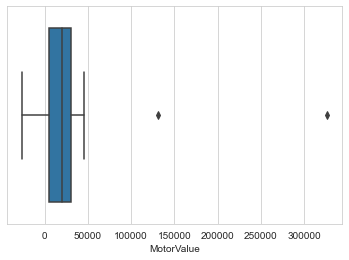

In [100]:
sns.boxplot(trainingData['MotorValue'])

In [101]:
trainingData.drop(trainingData[trainingData['Age'] <= 15].index, inplace = True)
trainingData.drop(trainingData[trainingData['Age'] >= 70].index, inplace = True)

In [102]:
Q1 = np.percentile(trainingData['MotorValue'], 10, 
                   interpolation = 'midpoint')

Q3 = np.percentile(trainingData['MotorValue'], 95, 
                   interpolation = 'midpoint')
Q1,Q3

(0.0, 37799.5)

In [103]:
trainingData.drop(trainingData[trainingData['MotorValue'] <= -1].index, inplace = True)
trainingData.drop(trainingData[trainingData['MotorValue'] >= 37799.5].index, inplace = True)

In [104]:
trainingData.MotorValue.count()

3744

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

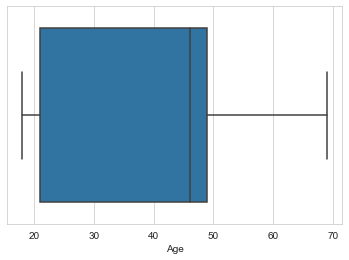

In [105]:
sns.boxplot(trainingData['Age'])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MotorValue'>

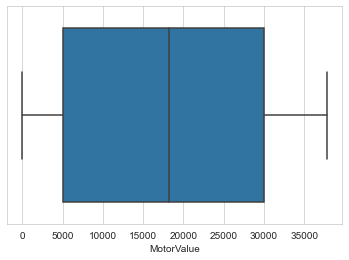

In [106]:
sns.boxplot(trainingData['MotorValue'])

In [107]:
X_drop.head()

,CustomerID,Title,GivenName,MiddleInitial,Surname,Gender,Location,PrefChannel,AMEX,Visa,Bundle_Motor_Type,Health_Type_Level1,Travel_Type_Backpacker,Travel_Type_Business,Travel_Type_Premium,Travel_Type_Senior,Travel_Type_Standard
0,1,Mrs.,Macy,A,Boyle,0,0,3,1,0,0,0,0,0,1,0,0
1,2,Ms.,Thea,L,McIntosh,0,0,2,1,0,0,1,0,0,0,0,0
2,4,Ms.,Murron,P,Miller,0,0,3,1,0,1,0,0,0,0,0,0
3,5,Mr.,Kai,A,Henderson,1,1,2,0,1,0,1,0,1,0,0,0
4,11,Mrs.,Kayla,A,Brown,0,1,1,0,1,0,0,0,0,0,0,0


In [108]:
X_ = trainingData.drop(X_drop, axis = 1)

In [109]:
Y_ = trainingData['PrefChannel']

In [110]:
X_train_, X_test_, Y_train_, Y_test_ = train_test_split(X_,Y_,test_size = 0.3)

X_train_.shape, X_test_.shape, Y_train_.shape, Y_test_.shape

((2620, 10), (1124, 10), (2620,), (1124,))

In [111]:
#LOGISTIC REGRESSION
LR3 = LogisticRegression()
LR3.fit(X_train_, Y_train_)
Y_predLR2 = LR3.predict(X_test_)
accuracy_score(Y_predLR2,Y_test_)

0.5604982206405694

In [112]:
DTE3 = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
DTE3.fit(X_train_,Y_train_)
y_predDF = DTE3.predict(X_test_)
accuracy_score(Y_test_,y_predDF)

0.6565836298932385

In [113]:
DTE4 = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
DTE4.fit(X_train_,Y_train_)
y_predDF = DTE4.predict(X_test_)
accuracy_score(Y_test_,y_predDF)

0.6654804270462633

In [114]:
#RANDOM FOREST
Rf3= RandomForestClassifier(n_estimators= 10, criterion="entropy") 
Rf3.fit(X_train_, Y_train_)
y_pred_RF= Rf3.predict(X_test_) 
accuracy_score(Y_test_, y_pred_RF)

0.5640569395017794

In [115]:
# #SVM
# SVM3 = SVC(kernel = 'linear')
# SVM3.fit(X_train_,Y_train_)
# y_predSVM = SVM3.predict(X_test_)
# accuracy_score(Y_test_,y_predSVM)

In [116]:
#NAIVE BAYES
NB3 = GaussianNB()
NB3.fit(X_train_,Y_train_)
y_pred_NB = NB3.predict(X_test_)
accuracy_score(Y_test_, y_pred_NB)

0.4991103202846975

In [117]:
#KNN
KNNmodel2 = KNeighborsClassifier(n_neighbors=11)
KNNmodel2.fit(X_train_, Y_train_)
Y_predKNN = KNNmodel2.predict(X_test_)
accuracy_score(Y_test_,Y_predKNN)

0.5818505338078291

In [118]:
scaler.fit(X_train_)

X_train_ = scaler.transform(X_train_)
X_test_ = scaler.transform(X_test_)
X_train_

array([[-1.26130763,  0.4711846 , -1.07046889, ..., -1.09368376,
        -0.64870972, -0.41124315],
       [ 0.86911991,  0.4711846 , -0.19129213, ...,  0.91434109,
         1.54152154, -0.41124315],
       [ 0.33651302,  0.4711846 , -0.47306009, ...,  0.91434109,
        -0.64870972, -0.41124315],
       ...,
       [ 0.40308888,  0.4711846 ,  0.99042368, ...,  0.91434109,
         1.54152154, -0.41124315],
       [ 0.60281646,  0.4711846 ,  1.13326493, ...,  0.91434109,
        -0.64870972,  2.43165145],
       [-1.46103521,  0.4711846 , -0.23323378, ..., -1.09368376,
        -0.64870972, -0.41124315]])

In [119]:
#LOGISTIC REGRESSION
LR4 = LogisticRegression()
LR4.fit(X_train_, Y_train_)
Y_predLR2 = LR4.predict(X_test_)
accuracy_score(Y_predLR2,Y_test_)

0.6663701067615658

In [120]:
#Decision Tree
DTE5 = DecisionTreeClassifier(criterion = "gini", random_state = 0,max_depth=3, min_samples_leaf=5)
DTE5.fit(X_train_,Y_train_)
y_predDF = DTE5.predict(X_test_)
accuracy_score(Y_test_,y_predDF)

0.6565836298932385

In [121]:
DTE6 = DecisionTreeClassifier(criterion = "entropy", random_state = 0,max_depth=3, min_samples_leaf=4)
DTE6.fit(X_train_,Y_train_)
y_predDF = DTE6.predict(X_test_)
accuracy_score(Y_test_,y_predDF)

0.6654804270462633

In [122]:
#RANDOM FOREST
Rf4= RandomForestClassifier(n_estimators= 10, criterion="entropy") 
Rf4.fit(X_train_, Y_train_)
y_pred_RF= Rf4.predict(X_test_) 
accuracy_score(Y_test_, y_pred_RF)

0.548932384341637

In [123]:
# #SVM
# SVM4 = SVC(kernel = 'linear')
# SVM4.fit(X_train_,Y_train_)
# y_predSVM = SVM4.predict(X_test_)
# accuracy_score(Y_test_,y_predSVM)

In [124]:
#NAIVE BAYES
NB4 = GaussianNB()
NB4.fit(X_train_,Y_train_)
y_pred_NB = NB4.predict(X_test_)
accuracy_score(Y_test_, y_pred_NB)

0.4786476868327402

In [125]:
#KNN
KNNmodel3 = KNeighborsClassifier(n_neighbors=11)
KNNmodel3.fit(X_train_, Y_train_)
Y_predKNN = KNNmodel3.predict(X_test_)
accuracy_score(Y_test_,Y_predKNN)

0.6379003558718861

In [126]:
#CLUSTERING

In [127]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3744 entries, 0 to 4089
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              3744 non-null   int64  
 1   Title                   3744 non-null   object 
 2   GivenName               3744 non-null   object 
 3   MiddleInitial           3744 non-null   object 
 4   Surname                 3744 non-null   object 
 5   Gender                  3744 non-null   int64  
 6   Age                     3744 non-null   int64  
 7   Location                3744 non-null   int64  
 8   MotorInsurance          3744 non-null   int64  
 9   MotorValue              3744 non-null   int32  
 10  HealthInsurance         3744 non-null   int64  
 11  HealthDependentsAdults  3744 non-null   float64
 12  HealthDependentsKids    3744 non-null   float64
 13  TravelInsurance         3744 non-null   int64  
 14  PrefChannel             3744 non-null   

In [128]:
x = trainingData.iloc[:, [6,9]].values #Motor insurance/Motor Value/ Motor Type
x
y = trainingData.iloc[:, [14]].values

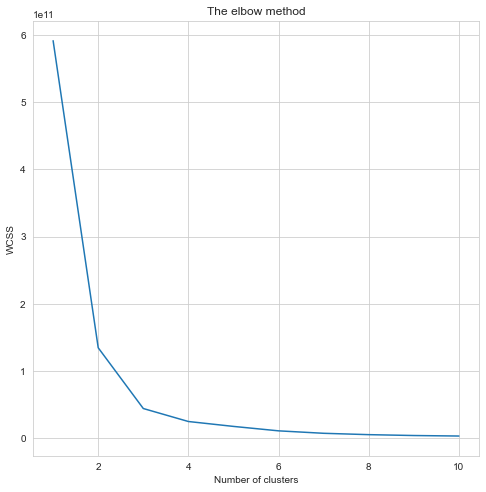

In [129]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize =(8,8))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

[48.25950413 46.24911868 31.62476723 40.55662188 36.96392496]


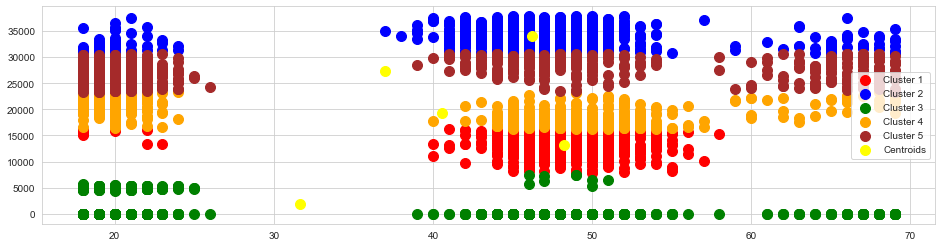

In [130]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(x)
x
df = pd.DataFrame(x, columns = ['Age', 'MotorValue'])
df['Cluster'] = pd.DataFrame(y_kmeans)
df.head()
plt.figure(figsize=(16, 4))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
# plt.xlabel('Age')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
print(kmeans.cluster_centers_[:,0])

In [131]:
writer = ExcelWriter('trainingDatasetcluster1111111.xlsx')
df.to_excel(writer, encoding='utf8', index=False)
writer.save() 

# SCORING DATASET

In [132]:
ScoringData.isnull().sum()

CustomerID                  0
Title                       0
GivenName                   0
MiddleInitial               0
Surname                     0
CreditCardType            205
Occupation                399
Gender                      0
Age                         0
Location                    0
MotorInsurance              0
MotorValue                188
MotorType                 188
HealthInsurance             0
HealthType                399
HealthDependentsAdults    399
HealthDependentsKids      399
TravelInsurance             0
TravelType                512
dtype: int64

In [133]:
#remove occupation
ScoringData = ScoringData.drop('Occupation',axis = 1)

In [134]:
#create dummies of credit card
dummy_creditCard1 = pd.get_dummies(ScoringData['CreditCardType'])
dummy_creditCard1.columns = ['AMEX','Visa']
dummy_creditCard1

,AMEX,Visa
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
1086,1,0
1087,0,1
1088,0,1
1089,0,1


In [135]:
ScoringData.drop(['CreditCardType'],axis = 1, inplace = True)
ScoringData =pd.concat([ScoringData,dummy_creditCard1],axis = 1)
ScoringData.head(4)

,CustomerID,Title,GivenName,MiddleInitial,Surname,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,AMEX,Visa
0,3,Mr.,Niall,T,Graham,male,52,Urban,Yes,17274.0,Single,No,NaN,NaN,NaN,No,NaN,1,0
1,6,Mr.,Harry,L,McDonald,male,49,Rural,Yes,11735.0,Single,Yes,Level1,2.0,3.0,Yes,Business,1,0
2,7,Dr.,Chanelle,L,Hay,female,18,Urban,Yes,4884.0,Bundle,No,NaN,NaN,NaN,Yes,Backpacker,1,0
3,8,Ms.,Alexandra,J,Ross,female,48,Urban,Yes,13879.0,Single,Yes,Level1,1.0,3.0,No,NaN,1,0


In [136]:
ScoringData["Gender"] =ScoringData["Gender"].apply(gender)

In [137]:
ScoringData['Gender'] = ScoringData['Gender'].replace(['Male'],1)
ScoringData['Gender'] = ScoringData['Gender'].replace(['female'],0)

In [138]:
ScoringData.head()

,CustomerID,Title,GivenName,MiddleInitial,Surname,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,AMEX,Visa
0,3,Mr.,Niall,T,Graham,1,52,Urban,Yes,17274.0,Single,No,NaN,NaN,NaN,No,NaN,1,0
1,6,Mr.,Harry,L,McDonald,1,49,Rural,Yes,11735.0,Single,Yes,Level1,2.0,3.0,Yes,Business,1,0
2,7,Dr.,Chanelle,L,Hay,0,18,Urban,Yes,4884.0,Bundle,No,NaN,NaN,NaN,Yes,Backpacker,1,0
3,8,Ms.,Alexandra,J,Ross,0,48,Urban,Yes,13879.0,Single,Yes,Level1,1.0,3.0,No,NaN,1,0
4,9,Mr.,Bailey,T,Atkinson,1,49,Rural,Yes,17294.0,Single,Yes,Level2,1.0,3.0,Yes,Standard,0,0


In [139]:
ScoringData['Location'] = ScoringData['Location'].replace(['Urban'],0)
ScoringData['Location'] = ScoringData['Location'].replace(['Rural'],1)

In [140]:
ScoringData

,CustomerID,Title,GivenName,MiddleInitial,Surname,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,AMEX,Visa
0,3,Mr.,Niall,T,Graham,1,52,0,Yes,17274.0,Single,No,NaN,NaN,NaN,No,NaN,1,0
1,6,Mr.,Harry,L,McDonald,1,49,1,Yes,11735.0,Single,Yes,Level1,2.0,3.0,Yes,Business,1,0
2,7,Dr.,Chanelle,L,Hay,0,18,0,Yes,4884.0,Bundle,No,NaN,NaN,NaN,Yes,Backpacker,1,0
3,8,Ms.,Alexandra,J,Ross,0,48,0,Yes,13879.0,Single,Yes,Level1,1.0,3.0,No,NaN,1,0
4,9,Mr.,Bailey,T,Atkinson,1,49,1,Yes,17294.0,Single,Yes,Level2,1.0,3.0,Yes,Standard,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,5169,Mrs.,Eleanor,D,Bennett,0,18,1,Yes,30271.0,Bundle,No,NaN,NaN,NaN,Yes,Premium,1,0
1087,5176,Mrs.,Rebecca,P,Milne,0,51,0,Yes,10999.0,Single,Yes,Level1,0.0,3.0,Yes,Standard,0,1
1088,5177,Mr.,Billy,C,Riley,1,52,1,Yes,16622.0,Single,Yes,Level2,0.0,2.0,No,NaN,0,1
1089,5179,Mr.,Russell,C,Shaw,1,47,1,Yes,11277.0,Single,No,NaN,NaN,NaN,No,NaN,0,1


In [141]:
ScoringData['MotorInsurance'] = ScoringData['MotorInsurance'].apply(yesNo)

In [142]:
ScoringData['MotorValue'] = ScoringData['MotorValue'].fillna(0)
ScoringData['MotorValue'] = ScoringData['MotorValue'].astype(int)

In [143]:
dummy_motorType1 = pd.get_dummies(ScoringData['MotorType'])
dummy_motorType1.columns = ['Bundle_Motor_Type','Single_Motor_Type']
dummy_motorType1

,Bundle_Motor_Type,Single_Motor_Type
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
1086,1,0
1087,0,1
1088,0,1
1089,0,1


In [144]:
ScoringData.drop(['MotorType'],axis = 1, inplace = True)

In [145]:
ScoringData =pd.concat([ScoringData,dummy_motorType1],axis = 1)

In [146]:
ScoringData['HealthInsurance'] = ScoringData['HealthInsurance'].apply(yesNo)

In [147]:
ScoringData['TravelInsurance'] = ScoringData['TravelInsurance'].apply(yesNo)

In [148]:
dummy_healthType1 = pd.get_dummies(ScoringData['HealthType'])
dummy_healthType1.columns = ['Health_Type_Level1','Health_Type_Level2','Health_Type_Level3']
dummy_healthType1.head(4)

,Health_Type_Level1,Health_Type_Level2,Health_Type_Level3
0,0,0,0
1,1,0,0
2,0,0,0
3,1,0,0


In [149]:
ScoringData.drop(['HealthType'],axis = 1, inplace = True)

In [150]:
ScoringData =pd.concat([ScoringData,dummy_healthType1],axis = 1)

In [151]:
dummy_travelType1 = pd.get_dummies(ScoringData['TravelType'])
dummy_travelType1.columns = ['Travel_Type_Backpacker','Travel_Type_Business','Travel_Type_Premium','Travel_Type_Senior','Travel_Type_Standard']
dummy_travelType1

,Travel_Type_Backpacker,Travel_Type_Business,Travel_Type_Premium,Travel_Type_Senior,Travel_Type_Standard
0,0,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
1086,0,0,1,0,0
1087,0,0,0,0,1
1088,0,0,0,0,0
1089,0,0,0,0,0


In [152]:
ScoringData.drop(['TravelType'],axis = 1, inplace = True)

In [153]:
ScoringData =pd.concat([ScoringData,dummy_travelType1],axis = 1)

In [154]:
ScoringData.columns

Index(['CustomerID', 'Title', 'GivenName', 'MiddleInitial', 'Surname',
       'Gender', 'Age', 'Location', 'MotorInsurance', 'MotorValue',
       'HealthInsurance', 'HealthDependentsAdults', 'HealthDependentsKids',
       'TravelInsurance', 'AMEX', 'Visa', 'Bundle_Motor_Type',
       'Single_Motor_Type', 'Health_Type_Level1', 'Health_Type_Level2',
       'Health_Type_Level3', 'Travel_Type_Backpacker', 'Travel_Type_Business',
       'Travel_Type_Premium', 'Travel_Type_Senior', 'Travel_Type_Standard'],
      dtype='object')

In [155]:
ScoringData['HealthDependentsAdults'] = ScoringData['HealthDependentsAdults'].fillna(0)

In [156]:
ScoringData['HealthDependentsKids'] = ScoringData['HealthDependentsKids'].fillna(0)

In [157]:
Q1 = np.percentile(ScoringData['Age'], 10, 
                   interpolation = 'midpoint')

Q3 = np.percentile(ScoringData['Age'], 95, 
                   interpolation = 'midpoint')
Q1,Q3

(19.0, 66.0)

In [158]:
ScoringData.count()

CustomerID                1091
Title                     1091
GivenName                 1091
MiddleInitial             1091
Surname                   1091
Gender                    1091
Age                       1091
Location                  1091
MotorInsurance            1091
MotorValue                1091
HealthInsurance           1091
HealthDependentsAdults    1091
HealthDependentsKids      1091
TravelInsurance           1091
AMEX                      1091
Visa                      1091
Bundle_Motor_Type         1091
Single_Motor_Type         1091
Health_Type_Level1        1091
Health_Type_Level2        1091
Health_Type_Level3        1091
Travel_Type_Backpacker    1091
Travel_Type_Business      1091
Travel_Type_Premium       1091
Travel_Type_Senior        1091
Travel_Type_Standard      1091
dtype: int64

In [159]:
Q1 = np.percentile(ScoringData['MotorValue'], 10, 
                   interpolation = 'midpoint')

Q3 = np.percentile(ScoringData['MotorValue'], 95, 
                   interpolation = 'midpoint')
Q1,Q3

(0.0, 37555.5)

In [160]:
ScoringData.drop(ScoringData[ScoringData['Age'] <= 15].index, inplace = True)
ScoringData.drop(ScoringData[ScoringData['Age'] >= 70].index, inplace = True)

ScoringData.drop(ScoringData[ScoringData['MotorValue'] <= -1].index, inplace = True)
ScoringData.drop(ScoringData[ScoringData['MotorValue'] >= 37555.5].index, inplace = True)

In [161]:
ScoringData.count()

CustomerID                1006
Title                     1006
GivenName                 1006
MiddleInitial             1006
Surname                   1006
Gender                    1006
Age                       1006
Location                  1006
MotorInsurance            1006
MotorValue                1006
HealthInsurance           1006
HealthDependentsAdults    1006
HealthDependentsKids      1006
TravelInsurance           1006
AMEX                      1006
Visa                      1006
Bundle_Motor_Type         1006
Single_Motor_Type         1006
Health_Type_Level1        1006
Health_Type_Level2        1006
Health_Type_Level3        1006
Travel_Type_Backpacker    1006
Travel_Type_Business      1006
Travel_Type_Premium       1006
Travel_Type_Senior        1006
Travel_Type_Standard      1006
dtype: int64

In [162]:
X_train = trainingData.drop(['CustomerID', 'Title', 'GivenName', 'MiddleInitial', 'Surname',
       'Gender', 'Location', 'PrefChannel', 'AMEX', 'Visa',
       'Bundle_Motor_Type', 'Health_Type_Level1', 'Travel_Type_Backpacker',
       'Travel_Type_Business', 'Travel_Type_Premium', 'Travel_Type_Senior',
       'Travel_Type_Standard'],axis = 1)

In [163]:
Y_train = trainingData['PrefChannel']

In [164]:
X_test = ScoringData.drop(['CustomerID', 'Title', 'GivenName', 'MiddleInitial', 'Surname',
       'Gender', 'Location', 'AMEX', 'Visa',
       'Bundle_Motor_Type', 'Health_Type_Level1', 'Travel_Type_Backpacker',
       'Travel_Type_Business', 'Travel_Type_Premium', 'Travel_Type_Senior',
       'Travel_Type_Standard'],axis = 1)

In [165]:
X_test

,Age,MotorInsurance,MotorValue,HealthInsurance,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,Single_Motor_Type,Health_Type_Level2,Health_Type_Level3
0,52,1,17274,0,0.0,0.0,0,1,0,0
1,49,1,11735,1,2.0,3.0,1,1,0,0
2,18,1,4884,0,0.0,0.0,1,0,0,0
3,48,1,13879,1,1.0,3.0,0,1,0,0
4,49,1,17294,1,1.0,3.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1086,18,1,30271,0,0.0,0.0,1,0,0,0
1087,51,1,10999,1,0.0,3.0,1,1,0,0
1088,52,1,16622,1,0.0,2.0,0,1,1,0
1089,47,1,11277,0,0.0,0.0,0,1,0,0


In [166]:
#Decision Tree
DTE5 = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
DTE5.fit(X_train,Y_train)
y_test = DTE5.predict(X_test)
y_test

array([2, 2, 3, ..., 2, 2, 1], dtype=int64)

In [167]:
# my_submission = pd.DataFrame({'Id': ScoringData.CustomerID, 'PrefChannel': y_predDF})
# my_submission.to_csv('Assignment_Submission_DTEE.csv', index=False)

In [168]:
dataframe=pd.DataFrame(y_test, columns=['a']) 

In [169]:
dataframe

,a
0,2
1,2
2,3
3,2
4,2
...,...
1001,1
1002,2
1003,2
1004,2


In [170]:
dataframe['a'] = dataframe['a'].replace([1],'Email')
dataframe['a'] = dataframe['a'].replace([2],'Phone')
dataframe['a'] = dataframe['a'].replace([3],'SMS')

In [171]:
dataframe

,a
0,Phone
1,Phone
2,SMS
3,Phone
4,Phone
...,...
1001,Email
1002,Phone
1003,Phone
1004,Phone


In [172]:
dataframe = dataframe.to_numpy()

In [173]:
dataframe = dataframe.ravel()

In [174]:
dataframe

array(['Phone', 'Phone', 'SMS', ..., 'Phone', 'Phone', 'Email'],
      dtype=object)

In [175]:
y_test11=pd.DataFrame(y_test, columns=['a']) 
y_test11

,a
0,2
1,2
2,3
3,2
4,2
...,...
1001,1
1002,2
1003,2
1004,2


In [176]:
my_submission = pd.DataFrame({'Id': ScoringData.CustomerID, 'PrefChannel': dataframe})
my_submission.to_csv('Assignment_Submission_DTEE1.csv', index=False)

In [177]:
log_model = LogisticRegression()
log_model.fit(X_train,Y_train)
Y_test = log_model.predict(X_test)
Y_test
my_submission = pd.DataFrame({'Id': ScoringData.CustomerID, 'PrefChannel': Y_test})
my_submission.to_csv('Assignment_Submission_DTEE.csv', index=False)

In [178]:
X_train_mod, X_test_mod, Y_train_mod, Y_test_mod = train_test_split(X_train, Y_train, test_size=0.20)
X_test_mod

,Age,MotorInsurance,MotorValue,HealthInsurance,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,Single_Motor_Type,Health_Type_Level2,Health_Type_Level3
3757,48,1,30854,1,1.0,3.0,1,1,0,1
1041,46,1,18117,1,1.0,3.0,0,1,1,0
9,49,1,23666,1,2.0,2.0,0,1,1,0
2659,20,1,19955,0,0.0,0.0,1,0,0,0
2084,56,0,0,1,0.0,2.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
210,18,1,26990,1,1.0,0.0,0,0,0,0
425,47,1,12008,1,2.0,2.0,0,1,1,0
2374,44,1,12767,0,0.0,0.0,0,1,0,0
2087,45,1,13809,1,1.0,2.0,0,1,1,0


In [179]:
scaler = StandardScaler()
scaler.fit(X_train_mod)

X_train_mod = scaler.transform(X_train_mod)
X_test_mod = scaler.transform(X_test_mod)
X_train_mod

array([[-1.25545254,  0.47798112, -1.06603537, ..., -1.08179936,
        -0.65335284, -0.40274572],
       [ 0.68369831,  0.47798112,  1.01602108, ...,  0.92438583,
        -0.65335284, -0.40274572],
       [-0.92111619,  0.47798112,  0.48886295, ..., -1.08179936,
        -0.65335284, -0.40274572],
       ...,
       [ 0.21562741,  0.47798112, -0.00497593, ...,  0.92438583,
        -0.65335284, -0.40274572],
       [ 0.28249468, -2.09213282, -1.43413375, ..., -1.08179936,
        -0.65335284, -0.40274572],
       [ 0.54996377,  0.47798112,  1.41101285, ...,  0.92438583,
         1.53056654, -0.40274572]])

In [180]:
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)

In [181]:
DT.fit(X_train_mod, Y_train_mod)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [182]:
Y_pred = DT.predict(X_test_mod)

In [183]:
Predicted = DT.predict(X_test)

In [184]:
output = pd.DataFrame({'Customer Id': ScoringData.CustomerID, 'PrefChannel': Predicted})
output.to_csv('my_submissiondtree_.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [185]:
#CLUSTERING

In [186]:
ScoringData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 1090
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1006 non-null   int64  
 1   Title                   1006 non-null   object 
 2   GivenName               1006 non-null   object 
 3   MiddleInitial           1006 non-null   object 
 4   Surname                 1006 non-null   object 
 5   Gender                  1006 non-null   int64  
 6   Age                     1006 non-null   int64  
 7   Location                1006 non-null   int64  
 8   MotorInsurance          1006 non-null   int64  
 9   MotorValue              1006 non-null   int32  
 10  HealthInsurance         1006 non-null   int64  
 11  HealthDependentsAdults  1006 non-null   float64
 12  HealthDependentsKids    1006 non-null   float64
 13  TravelInsurance         1006 non-null   int64  
 14  AMEX                    1006 non-null   

In [187]:
x_ = ScoringData.iloc[:, [6,9]].values #Motor insurance/Motor Value/ Motor Type
x_

array([[   52, 17274],
       [   49, 11735],
       [   18,  4884],
       ...,
       [   52, 16622],
       [   47, 11277],
       [   50, 32673]], dtype=int64)

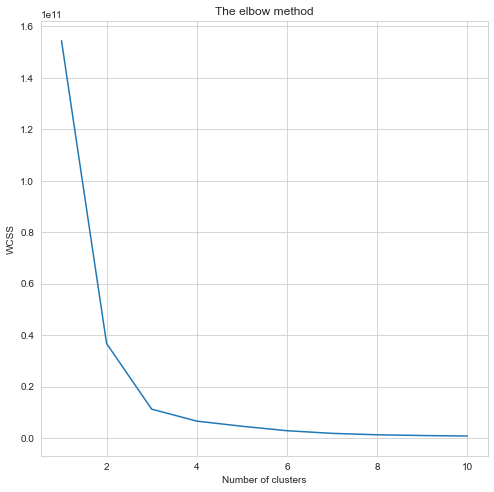

In [188]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_)
    wcss.append(kmeans.inertia_)

plt.figure(figsize =(8,8))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


[37.9        31.94117647 48.76041667 47.22966507 39.03267974]


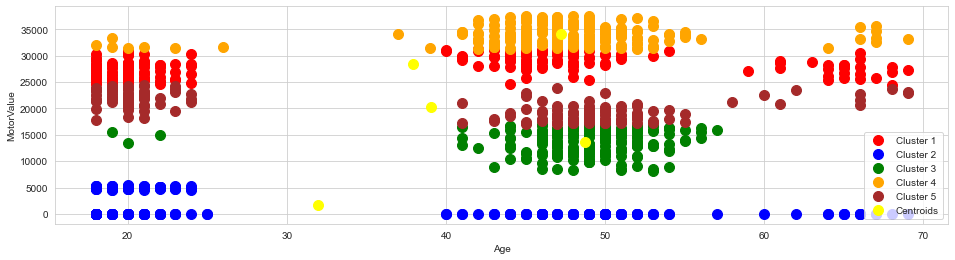

In [189]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans_ = kmeans.fit_predict(x_)
x_
df1 = pd.DataFrame(x_, columns = ['Age', 'MotorValue'])
df1['Cluster'] = pd.DataFrame(y_kmeans_)

plt.figure(figsize=(16, 4))
plt.scatter(x_[y_kmeans_ == 0, 0], x_[y_kmeans_ == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_[y_kmeans_ == 1, 0], x_[y_kmeans_ == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_[y_kmeans_ == 2, 0], x_[y_kmeans_ == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x_[y_kmeans_ == 3, 0], x_[y_kmeans_ == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(x_[y_kmeans_ == 4, 0], x_[y_kmeans_ == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.xlabel('Age')
plt.ylabel('MotorValue')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
print(kmeans.cluster_centers_[:,0])


In [190]:
writer = ExcelWriter('FINALscoringDatasetClustertry1.xlsx')
df1.to_excel(writer, encoding='utf8', index=False)
writer.save()

In [191]:
writer = ExcelWriter('FINALscoringDataset11.xlsx')
ScoringData.to_excel(writer, encoding='utf8', index=False)
writer.save()